In [1]:
import os

print(os.path.abspath(os.curdir))

e:\Data Kuliah\S2 ITS\Semester 6\IEEE Access\DroMoLog\notebooks


In [3]:
import os
os.chdir("..")

In [4]:
print(os.path.abspath(os.curdir))

e:\Data Kuliah\S2 ITS\Semester 6\IEEE Access\DroMoLog


In [9]:
import pandas as pd
# idx2label = {
#         1: 'Normal',
#         2: 'Low',
#         3: 'Medium',
#         4: 'High'
#     }
filtered_train = pd.read_csv('dataset/filtered_train.csv')
filtered_test = pd.read_csv('dataset/filtered_test.csv')
merged_filtered = pd.concat([filtered_train, filtered_test])
# concatenating df1 and df2 along rows
filtered_merged = pd.concat([filtered_train, filtered_test], axis=0)
# filtered["label"] = filtered['label'].map(idx2label)
print(f'train: {filtered_train["label"].value_counts()}, {filtered_train["label"].value_counts().sum()}')
print(f'test: {filtered_test["label"].value_counts()}, {filtered_test["label"].value_counts().sum()}')
print(f'merged: {merged_filtered["label"].value_counts()}, {merged_filtered["label"].value_counts().sum()}')
# filtered.head(5)

train: label
low       173
normal    161
medium    104
high       30
Name: count, dtype: int64, 468
test: label
low       43
normal    40
medium    26
high       8
Name: count, dtype: int64, 117
merged: label
low       216
normal    201
medium    130
high       38
Name: count, dtype: int64, 585


In [8]:
unfiltered_train = pd.read_csv('dataset/unfiltered_train.csv')
unfiltered_test = pd.read_csv('dataset/unfiltered_test.csv')
# concatenating df1 and df2 along rows
unfiltered_merged = pd.concat([unfiltered_train, unfiltered_test], axis=0)
# unfiltered["label"] = unfiltered['label'].map(idx2label)
print(f'train: {unfiltered_train["label"].value_counts()}, {unfiltered_train["label"].value_counts().sum()}')
print(f'test: {unfiltered_test["label"].value_counts()}, {unfiltered_test["label"].value_counts().sum()}')
print(f'test: {unfiltered_merged["label"].value_counts()}, {unfiltered_merged["label"].value_counts().sum()}')
# filtered.head(5)

train: label
normal    696
medium    632
low       433
high       32
Name: count, dtype: int64, 1793
test: label
normal    174
medium    159
low       108
high        8
Name: count, dtype: int64, 449
test: label
normal    870
medium    791
low       541
high       40
Name: count, dtype: int64, 2242


In [5]:
def count_word(sentence):
    num_word = sentence.split(' ')
    return len(num_word)

def count_sentence(message):
    num_sentence = message.split('.')
    return len(num_sentence)

filtered['word'] = filtered['message'].map(count_word) 
filtered['sentence'] = filtered['message'].map(count_sentence) 
filtered.head(5)

,message,label,word,sentence
0,A passenger aircraft is approaching. Descend a...,High,10,2
1,A passenger aircraft is nearby. Fly with caution,Low,8,2
2,Abnormal compass function or GPS signal detect...,Medium,12,2
3,Accelerator is Over Range,Medium,4,1
4,Account not logged in. Flight altitude and dis...,Low,17,3


In [6]:
print(filtered['word'].mean())

8.781196581196582


In [7]:
print(filtered['word'].std())

5.529806091994256


AttributeError: module 'matplotlib' has no attribute 'show'

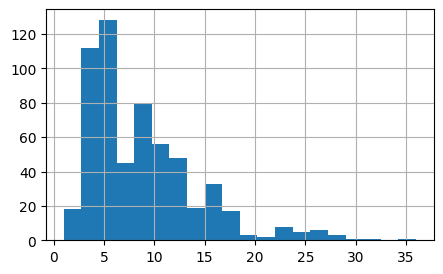

In [24]:
import matplotlib as plt
filtered['word'].hist(figsize=[5, 3], bins=20)
plt.show() 
plt.close()

AttributeError: module 'matplotlib' has no attribute 'show'

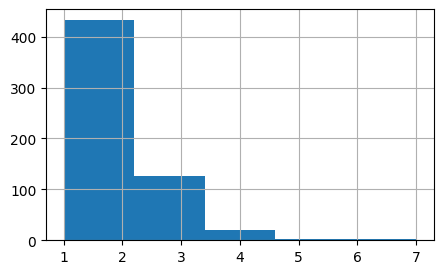

In [26]:
filtered['sentence'].hist(figsize=[5, 3], bins=5)
plt.show() 
plt.close()

In [8]:
import pandas as pd
idx2label = {
        1: 'normal',
        2: 'low',
        3: 'medium',
        4: 'high'
    }
filtered = pd.read_csv('dataset/merged-manual-unfiltered.csv')
filtered["label"] = filtered['label'].map(idx2label)
filtered['label'].value_counts()
# filtered.head(5)

label
normal    870
medium    790
low       541
high       40
Name: count, dtype: int64

<Figure size 500x250 with 0 Axes>

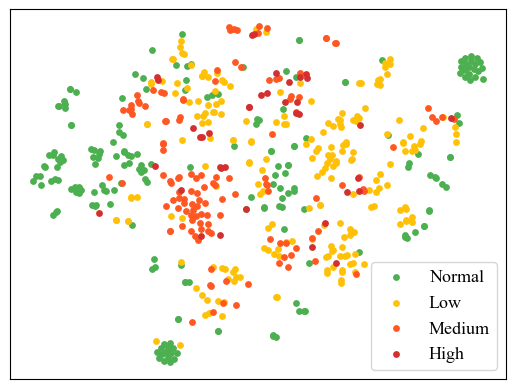

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer
import pandas as pd
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 13
# Load your dataset with two columns: 'message' and 'label'
# Replace 'your_dataset.csv' with the actual file path
data = pd.read_csv('dataset/merged-manual-unique.csv')
# data = pd.read_csv('dataset/merged-manual-unfiltered.csv')
# data = pd.read_csv('your_dataset.csv')
idx2label = {
        1: 'Normal',
        2: 'Low',
        3: 'Medium',
        4: 'High'
    }
# texts = data['message'].tolist()
data["label"] = data['label'].map(idx2label)
# texts = df['message'].tolist()
# label_encoder_multi = LabelEncoder()
# df["label"] = label_encoder_multi.fit_transform(df["label"].to_list())
# labels = df['label'].tolist()
# Example labels mapping (modify based on your actual labels)
label_mapping = {
    'Normal': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3
}

# Map text labels to numerical labels
# data['label'] = data['label'].map(label_mapping)

# Extract message texts and labels
texts = data['message'].tolist()
labels = data['label'].tolist()

# Load a pre-trained SBERT model
model = SentenceTransformer('all-mpnet-base-v2')  # You can choose a different model x384
# Encode the message texts to obtain SBERT embeddings
embeddings = model.encode(texts, convert_to_tensor=True)
# print(embeddings[0])
# King - Queen = Man - Women # GloVe
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)
# Create a scatter plot with labeled points and legend
plt.figure(figsize=(5, 2.5))
fig, ax = plt.subplots()

unique_labels = set(labels)  # Get unique labels
unique_labels = ['Normal', 'Low', 'Medium', 'High']
colors = ['#4CAF50', '#FFC107', '#FF5722', '#D32F2F']
# print(unique_labels)
counter = 0
for label in unique_labels:
    # Filter data points for each unique label
    x_filtered = [reduced_embeddings[i][0] for i in range(len(reduced_embeddings)) if labels[i] == label]
    y_filtered = [reduced_embeddings[i][1] for i in range(len(reduced_embeddings)) if labels[i] == label]
    ax.scatter(x_filtered, y_filtered, label=label, s=15, c=colors[counter])
    counter+=1

# Add labels and title
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_title('Scatter Plot with Unique Labels in Legend')

# Add a legend with only unique labels
ax.set_xticks([])
ax.set_yticks([])
legend = ax.legend(loc='lower right')
# Adjust the spacing between marker and label
# legend.legend_handles[0]._sizes = [7]  # Adjust the marker size
# legend.legend_handles[1]._sizes = [7]  # Adjust the marker size
# legend.get_lines()[0].set_markersize(10)  # Adjust the marker size
# legend.get_lines()[1].set_markersize(10)  # Adjust the marker size
# legend.set_title('Legend')  # Set a title for the legend
# ax.legend()

# Display the plot
plt.savefig(os.path.join('dataset', "data_viz-filtered-mpnet-multiclass-times.pdf"), bbox_inches='tight')
plt.show()
plt.close()

In [57]:
print(data.head(5))
label2binary = {
        'Normal': 'Normal',
        'Low': 'Anomaly',
        'Medium': 'Anomaly',
        'High': 'Anomaly'
    }
# texts = data['message'].tolist()
data["label"] = data['label'].map(label2binary)

                                             message   label
0  A passenger aircraft is approaching. Descend a...    High
1   A passenger aircraft is nearby. Fly with caution     Low
2  Abnormal compass function or GPS signal detect...  Medium
3                          Accelerator is Over Range  Medium
4  Account not logged in. Flight altitude and dis...     Low


<Figure size 500x250 with 0 Axes>

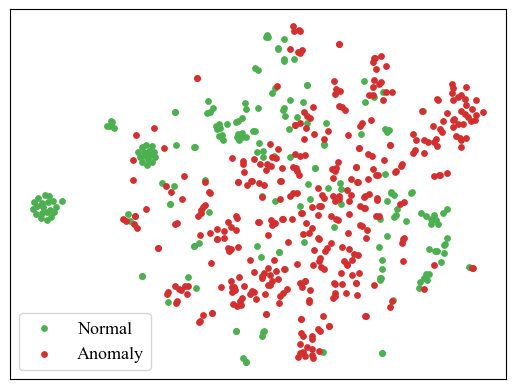

In [58]:

# texts = df['message'].tolist()
# label_encoder_multi = LabelEncoder()
# df["label"] = label_encoder_multi.fit_transform(df["label"].to_list())
# labels = df['label'].tolist()
# Example labels mapping (modify based on your actual labels)
label_mapping = {
    'Normal': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3
}

# Map text labels to numerical labels
# data['label'] = data['label'].map(label_mapping)

# Extract message texts and labels
texts = data['message'].tolist()
labels = data['label'].tolist()

# Load a pre-trained SBERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # You can choose a different model x384
# Encode the message texts to obtain SBERT embeddings
embeddings = model.encode(texts, convert_to_tensor=True)
# print(embeddings[0])
# King - Queen = Man - Women # GloVe
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)
# Create a scatter plot with labeled points and legend
plt.figure(figsize=(5, 2.5))
fig, ax = plt.subplots()

unique_labels = set(labels)  # Get unique labels
unique_labels = ['Normal', 'Anomaly']
colors = ['#4CAF50', '#D32F2F']
# print(unique_labels)
counter = 0
for label in unique_labels:
    # Filter data points for each unique label
    x_filtered = [reduced_embeddings[i][0] for i in range(len(reduced_embeddings)) if labels[i] == label]
    y_filtered = [reduced_embeddings[i][1] for i in range(len(reduced_embeddings)) if labels[i] == label]
    ax.scatter(x_filtered, y_filtered, label=label, s=15, c=colors[counter])
    counter+=1

# Add labels and title
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_title('Scatter Plot with Unique Labels in Legend')

# Add a legend with only unique labels
ax.set_xticks([])
ax.set_yticks([])
legend = ax.legend(loc='lower left')
# Adjust the spacing between marker and label
# legend.legend_handles[0]._sizes = [7]  # Adjust the marker size
# legend.legend_handles[1]._sizes = [7]  # Adjust the marker size
# legend.get_lines()[0].set_markersize(10)  # Adjust the marker size
# legend.get_lines()[1].set_markersize(10)  # Adjust the marker size
# legend.set_title('Legend')  # Set a title for the legend
# ax.legend()

# Display the plot
plt.savefig(os.path.join('dataset', "data_viz-filtered-binary-times.pdf"), bbox_inches='tight')
plt.show()
plt.close()

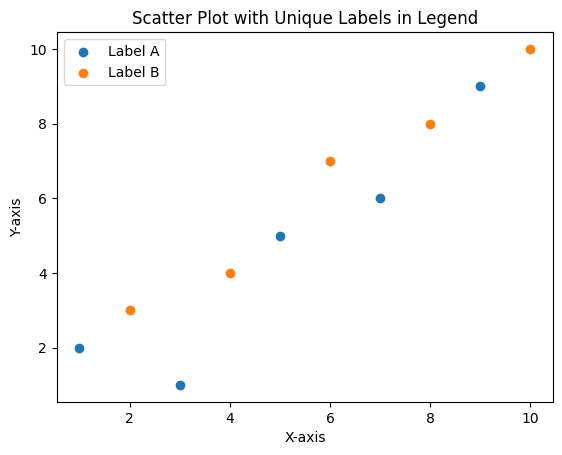

In [18]:
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
x_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_data = [2, 3, 1, 4, 5, 7, 6, 8, 9, 10]
labels = ['Label A', 'Label B', 'Label A', 'Label B', 'Label A', 'Label B', 'Label A', 'Label B', 'Label A', 'Label B']  # Use only 2 labels



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Replace 'your_data.csv' with the actual file name or provide your DataFrame
data = pd.read_csv('dataset/merged-manual-unique.csv')
# df = pd.read_csv('your_data.csv')
high = data[data['label'] == 4]
medium = data[data['label'] == 3]
low = data[data['label'] == 2]
normal = data[data['label'] == 1]


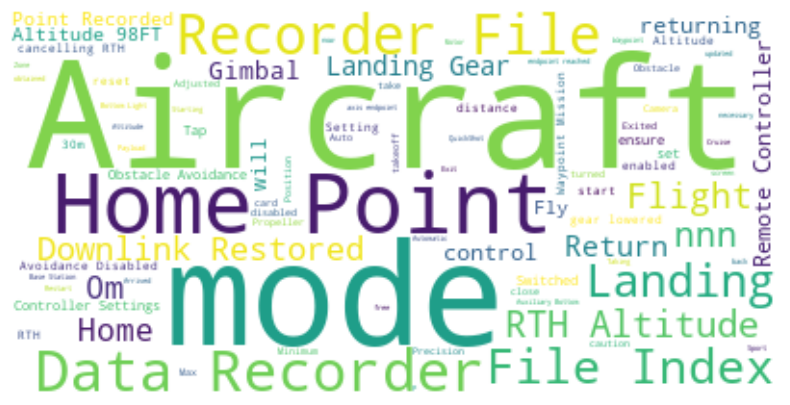

In [22]:
# Concatenate all log messages into a single string
text = ' '.join(normal['message'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(os.path.join('dataset', "data_viz-wordcloud_normal.pdf"), bbox_inches='tight')
plt.show()
plt.close()


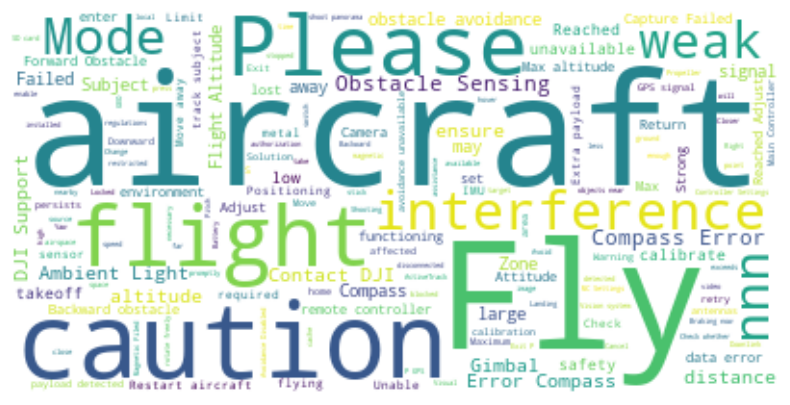

In [23]:
# Concatenate all log messages into a single string
text = ' '.join(low['message'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(os.path.join('dataset', "data_viz-wordcloud_low.pdf"), bbox_inches='tight')
plt.show()
plt.close()

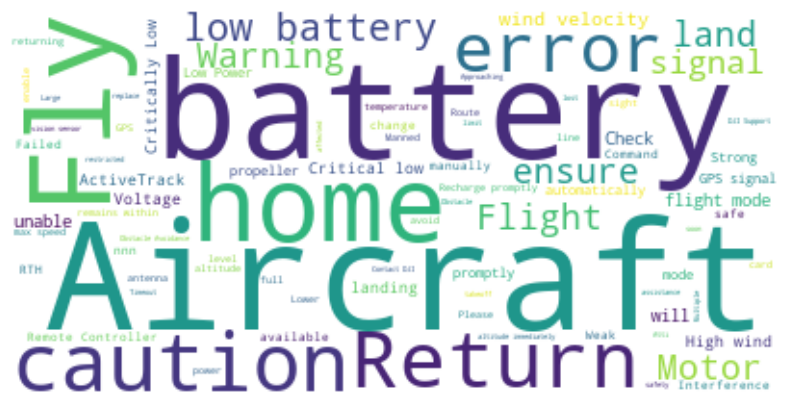

In [24]:
# Concatenate all log messages into a single string
text = ' '.join(medium['message'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(os.path.join('dataset', "data_viz-wordcloud_medium.pdf"), bbox_inches='tight')
plt.show()
plt.close()

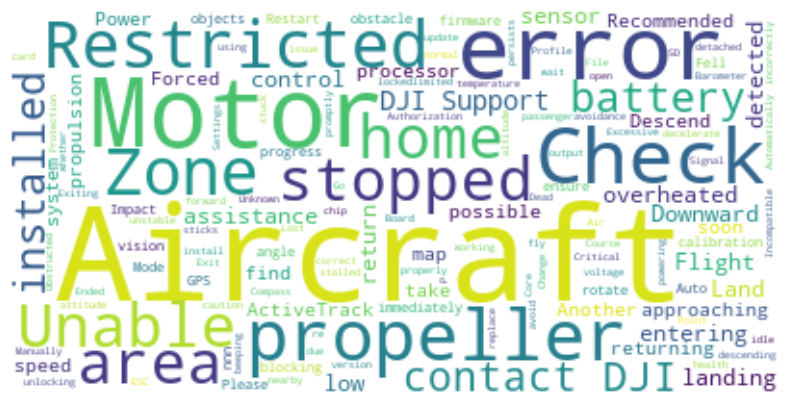

In [25]:
# Concatenate all log messages into a single string
text = ' '.join(high['message'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(os.path.join('dataset', "data_viz-wordcloud_high.pdf"), bbox_inches='tight')
plt.show()
plt.close()

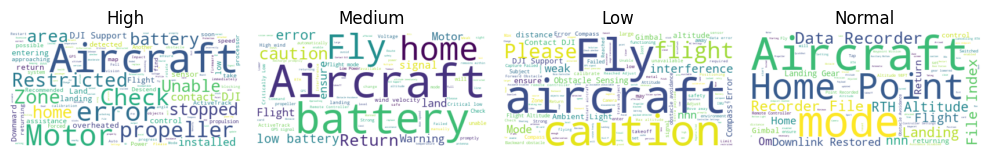

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample DataFrame (replace this with your actual DataFrame)
# data = {'log_messages': ['message1', 'message2', 'message3', 'message4'], 'category': ['A', 'B', 'C', 'A']}
data = pd.read_csv('dataset/merged-manual-unique.csv')
idx2label = {
        1: 'Normal',
        2: 'Low',
        3: 'Medium',
        4: 'High'
    }
data["label"] = data['label'].map(idx2label)
df = pd.DataFrame(data)

# Create subplots for each category
categories = ['High', 'Medium', 'Low', 'Normal']
# categories = df['label'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 4))
axes = axes.flatten()

# Generate word cloud for each category
for i, category in enumerate(categories):
    ax = axes[i]
    text_category = ' '.join(df[df['label'] == category]['message'].dropna())
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text_category)

    # Plot word cloud in the corresponding subplot
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'{category}')
    ax.axis('off')

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig(os.path.join('dataset', "data_viz-wordcloud.pdf"), bbox_inches='tight')
plt.show()
plt.close()